In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# check keys for first entry in dictionary form
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21fbfa19cc0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Calculate the date 1 year ago from the last data point in the database

# first calculate the last date
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#convert last date into datetime
ldt = datetime.strptime(str(lastdate[0]), "%Y-%m-%d")

# substract one year from last
query_date = ldt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prc_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).all()
prc_results


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
# to avoid formatting errors it's also possible to convert the query_date into a string first and filter by two strings
# str_query_date = query_date.strftime("%Y-%m-%d")
# session.query(Measurement.date, Measurement.prcp).\
#     filter(func.strftime("%Y-%m-%d", Measurement.date) > time).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prc_df = pd.DataFrame(prc_results)
prc_df = prc_df.rename(columns={'date':'Date', 'prcp':'Precipitation'})
prc_df = prc_df.set_index("Date")
# Sort the dataframe by date and drop NaN values
prc_df = prc_df.sort_index().dropna()
prc_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data
prc_plot = df.plot(kind='bar')
prc_plot;
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame.describe(prc_df)

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
print(f'There are {station_count} stations.')

There are 9 stations.


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Station.name, Measurement.date, Measurement.prcp, Measurement.tobs]
station_measurements = session.query(*sel).filter(Station.station == Measurement.station).all()
sm_df = pd.DataFrame(station_measurements)
sm_df.dropna(inplace=True)
sm_df_group = sm_df.iloc[:,0:2]
sm_df_group = sm_df_group.groupby("name").count().sort_values('date', ascending=False)
sm_df_group.rename(columns={'date':'Count'})


,Count
name,
"WAIHEE 837.5, HI US",2772
"KANEOHE 838.1, HI US",2696
"WAIKIKI 717.2, HI US",2685
"WAIMANALO EXPERIMENTAL FARM, HI US",2572
"MANOA LYON ARBO 785.2, HI US",2484
"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
"HONOLULU OBSERVATORY 702.2, HI US",1932
"PEARL CITY, HI US",683
"UPPER WAHIAWA 874.3, HI US",342


In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
    # highest temp recorded and station
temp_max = session.query(Station.name, func.max(Measurement.tobs)).filter(Station.station == Measurement.station).all()
    #lowest temp recorded and station
temp_min = session.query(Station.name, func.min(Measurement.tobs)).filter(Station.station == Measurement.station).all()
    #average temp at the most active station
temp_avg = session.query(Station.name, func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.name == sm_df_group.index[0]).\
    all()

    #print results
print(f'Max Temperature: {temp_max[0][1]} at {temp_max[0][0]} station. \nMin Temperature: {temp_min[0][1]} at {temp_min[0][0]} station. \nAverage Temperature: {round(temp_avg[0][1],2)} at {temp_avg[0][0]} station.')

Max Temperature: 87.0 at WAIKIKI 717.2, HI US station. 
Min Temperature: 53.0 at HONOLULU OBSERVATORY 702.2, HI US station. 
Average Temperature: 71.66 at WAIHEE 837.5, HI US station.


In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
obs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > query_date).\
    filter(Station.name == temp_max[0][0]).\
    all()

#plot the results as a histogram








[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 80.0),
 ('2016-10-

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [70]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
ct1 = calc_temps('2017-08-01', '2017-08-10')
print(ct1)
print(f'Minimum Trip Temperature from 08/01/2017 to 08/10/2017 is: {ct1[0][0]} \
    \nAverage Trip Temperature from 08/01/2017 to 08/10/2017 is: {round(ct1[0][1],2)} \
    \nMaximum Trip Temperature from 08/01/2017 to 08/10/2017 is: {ct1[0][2]}')

[(71.0, 79.02564102564102, 83.0)]
Minimum Trip Temperature from 08/01/2017 to 08/10/2017 is: 71.0     
Average Trip Temperature from 08/01/2017 to 08/10/2017 is: 79.03     
Maximum Trip Temperature from 08/01/2017 to 08/10/2017 is: 83.0


79.02564102564102


TypeError: 'int' object is not callable

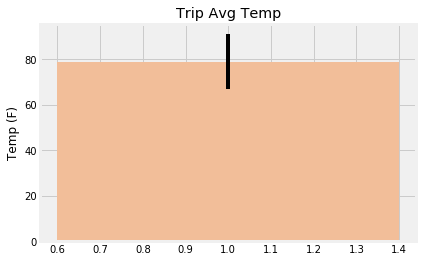

In [124]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# yerr = (ct1[0][2]-ct1[0][0])
# trip_bar = plt.bar(x=0.5, height=ct1[0][1],width=1, align='center',yerr=yerr,color='#f2be99')
# plt.ylabel('Temp (F)')
# plt.title('Trip Avg Temp')
# plt.ylim(0,100)
# plt.show();

fig, ax = plt.subplots()
x_pos = 1
yerr = ct1[0][2]-ct1[0][0]
height = ct1[0][1]

ax.bar(x_pos,height=height,yerr=yerr,align='center',color='#f2be99')
ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')

# plt.savefig('Images')
plt.ylim(0, 100)
fig.tight_layout()
plt.show()

print(height)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
